## Association Rule Learning Homework

*Prepared by:*
**Jude Michael Teves**  
Faculty, Software Technology Department  
College of Computer Studies - De La Salle University

---

Submitted by:
- Guerra, Jose Maria Angelo
- Hinolan, Charles Joseph
- Lasala, Kyle Carlo
- Lorenzo, Antonio Jose Maria
- Roco, Katrina Bianca

## Requirements

Answer the following questions:

**Groceries Dataset**  
1. Calculate the association rules and find the `significant/interesting` items in this dataset. Feel free to use any threshold value. (10 pts)
    - group the items by member
    - group the items by month
2. What would you recommend to the owner of a grocery store given these association rules? (15 pts)
3. Is there any other grouping that could give us high confidence/interest? (10 pts)

**Another Dataset**  
1. Find another dataset that can be turned into an association rule learning problem. Ideally, more than 1000 transactions/records. This does not have to be grocery-related. (20 pts)
2. Similar to the grocery dataset, calculate the association rules and find the `significant/interesting` items. (10 pts)
3. What would you recommend given the association rules? (25 pts)
4. Any other learning?

Note:
 - You have to create a writeup on the code you've written. Make sure that the code is clean as well. (5 pts)
 - Cite references if there are any. If you will be using the code I've given, cite it. If you got help from your peers, cite it as well. (5 pts)
 - Submit the link for your copy of this Google Colaboratory notebook. **Make sure it's public**. You may use incognito to see if the link is accessible.

<hr>

## Grading Criteria

|Criteria|Points|
|---|---|
|Groceries Dataset Analysis|35|
|Another Dataset Analysis|55|
|Code Cleanliness|5|
|References|5|


## Preliminaries

### Import libraries

We will be using the `PyFIM` library to do association rule learning in this homework. If this is not already installed in your environment, you may use the either of the following commands in your command line:

```conda install -c conda-forge pyfim``` or
```pip install pyfim```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from fim import arules, apriori, fpgrowth

### Prepare the dataset

We will be utilizing the <a href="https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset">Groceries dataset</a> from Kaggle.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Cyntwikip/data-repository/main/groceries.csv')
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


## Data Preprocessing and Cleaning

Before exploring and analyzing the dataset, data cleaning and preprocessing techniques shall first be performed to address inconsistencies within the dataset that could result in any erroneous data analysis.

### Check for Incorrect Datatypes

In [3]:
# checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [4]:
# convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


### Check for Default Values

In [5]:
# checking items
unique_items = df['itemDescription'].unique()
print("Number of Unique Items:", len(unique_items))
print(sorted(unique_items))

Number of Unique Items: 167
['Instant food products', 'UHT-milk', 'abrasive cleaner', 'artif. sweetener', 'baby cosmetics', 'bags', 'baking powder', 'bathroom cleaner', 'beef', 'berries', 'beverages', 'bottled beer', 'bottled water', 'brandy', 'brown bread', 'butter', 'butter milk', 'cake bar', 'candles', 'candy', 'canned beer', 'canned fish', 'canned fruit', 'canned vegetables', 'cat food', 'cereals', 'chewing gum', 'chicken', 'chocolate', 'chocolate marshmallow', 'citrus fruit', 'cleaner', 'cling film/bags', 'cocoa drinks', 'coffee', 'condensed milk', 'cooking chocolate', 'cookware', 'cream', 'cream cheese ', 'curd', 'curd cheese', 'decalcifier', 'dental care', 'dessert', 'detergent', 'dish cleaner', 'dishes', 'dog food', 'domestic eggs', 'female sanitary products', 'finished products', 'fish', 'flour', 'flower (seeds)', 'flower soil/fertilizer', 'frankfurter', 'frozen chicken', 'frozen dessert', 'frozen fish', 'frozen fruits', 'frozen meals', 'frozen potato products', 'frozen vegeta

## Grouping Items by Member

To calculate the associaton rules and find the significant/interesting items in the dataset according to `Member_number` and `Date`

In [6]:
df_grouped = df.groupby(['Member_number','Date']).agg(list)
df_grouped.sort_values(['Member_number', 'Date'], inplace=True)
df_grouped

itemDescription
Member_number Date                                                         
1000          2014-06-24                  [whole milk, pastry, salty snack]
              2015-03-15  [sausage, whole milk, semi-finished bread, yog...
              2015-05-27                         [soda, pickled vegetables]
              2015-07-24                     [canned beer, misc. beverages]
              2015-11-25                        [sausage, hygiene articles]
...                                                                     ...
4999          2015-05-16                  [butter milk, whipped/sour cream]
              2015-12-26                             [bottled water, herbs]
5000          2014-03-09                    [fruit/vegetable juice, onions]
              2014-11-16                   [bottled beer, other vegetables]
              2015-02-10       [soda, root vegetables, semi-finished bread]

[14963 rows x 1 columns]

In [7]:
# convert to list format
transactions = df_grouped['itemDescription'].to_list()
transactions

[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['beef', 'white bread'],
 ['frankfurter', 'curd'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['sausage', 'rolls/buns'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['dish cleaner', 'cling film/bags'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'shopping bags'],
 ['root vegetables', 'whole milk', 'pastry'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['other vegetables', 'hygiene

### Frequent Itemset Mining

In [8]:
# calculates the frequent itemset using fpgrowth algorithm
def get_fim(supp, transactions):
    result = fpgrowth(transactions, supp=supp, report='as')
    colnames = ['itemset'] + ['support_absolute', 'support_relative']
    df_result = pd.DataFrame(result, columns=colnames)
    df_result = df_result.sort_values('support_absolute', ascending=False)
    return df_result

#### Checking for Ideal Support Threshold

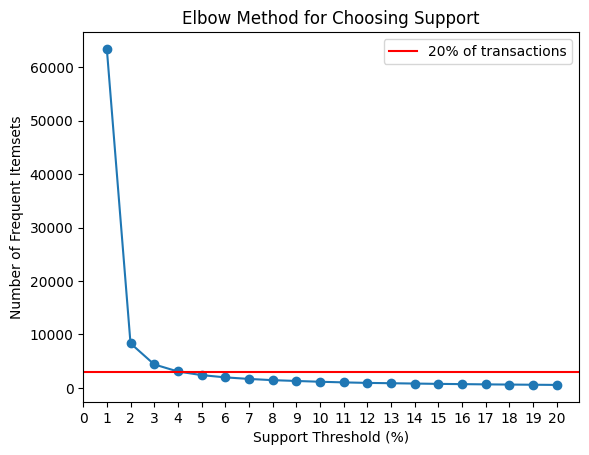

In [9]:
supports = range(1, 21)  # Test supports from 1% to 20%
num_itemsets = []

for supp in supports:
    rules = get_fim(supp*-1, transactions)
    num_itemsets.append(len(rules))

plt.plot(supports, num_itemsets, marker='o')
plt.axhline(y = len(df_grouped)*0.2, color = 'r', label = '20% of transactions')
plt.xticks([x for x in range(21)])
plt.xlabel("Support Threshold (%)")
plt.ylabel("Number of Frequent Itemsets")
plt.title("Elbow Method for Choosing Support")
plt.legend()
plt.show()

#### Zoom in the Plot

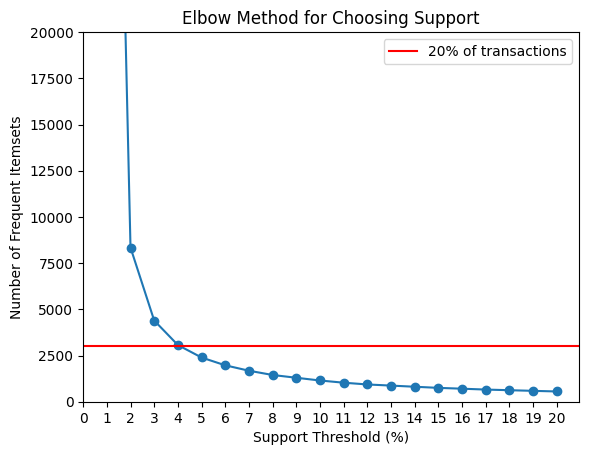

In [10]:
plt.plot(supports, num_itemsets, marker='o')
plt.axhline(y = len(df_grouped)*0.2, color = 'r', label = '20% of transactions')
plt.xticks([x for x in range(21)])
plt.xlabel("Support Threshold (%)")
plt.ylabel("Number of Frequent Itemsets")
plt.ylim([0,20000])
plt.title("Elbow Method for Choosing Support")
plt.legend()
plt.show()

The Support Threshold is obtained through the **elbow method** (inspired from K-Means Clustering) to generate *enough* rules and avoid *noise*. <br/>
Ideally, we want to be approximately equal to 20% of the transactions (represented by the redline) and not very steep nor flat at the given point so that we avoid the exteremely rare and extremely common itemsets. <br/> Hence, the
***Support Threshold is set to 4.***

#### Get the Frequent Itemsets given that Support Threshold is set to 4

In [11]:
get_fim(-4, transactions)

,itemset,support_absolute,support_relative
0,"(whole milk,)",2363,0.157923
2,"(other vegetables,)",1827,0.122101
6,"(rolls/buns,)",1646,0.110005
13,"(soda,)",1453,0.097106
24,"(yogurt,)",1285,0.085879
...,...,...,...
1635,"(meat, waffles)",4,0.000267
250,"(shopping bags, pip fruit, rolls/buns)",4,0.000267
602,"(butter, pastry, other vegetables)",4,0.000267
1280,"(salty snack, yogurt, whole milk)",4,0.000267


### Significant Itemsets

In [12]:
# calculates the frequent itemset using fpgrowth algorithm
def get_sig(supp, conf, transactions):
    result = arules(transactions, supp=supp, conf=conf, report='bxc')
    colnames = ['consequent', 'antecedent'] + ['support_absolute', 'support_relative', 'confidence']
    df_result = pd.DataFrame(result, columns=colnames)
    df_result = df_result.sort_values('support_absolute', ascending=False)
    return df_result

# b - absolute body/antecedent item set  support (number of transactions)
# x - relative body/antecedent item set  support as a fraction
# c - rule confidence as a fraction

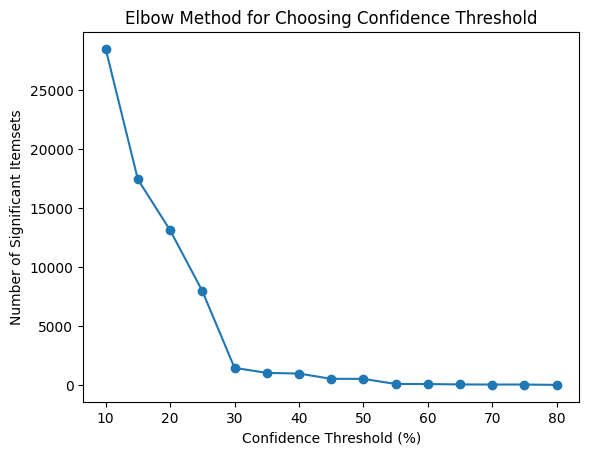

In [13]:
confidence = range(10, 81, 5)  # Test supports from 1% to 20%
num_itemsets = []

for conf in confidence:
    rules = get_sig(-4, conf, transactions)
    num_itemsets.append(len(rules))

plt.plot(confidence, num_itemsets, marker='o')
plt.xlabel("Confidence Threshold (%)")
plt.ylabel("Number of Significant Itemsets")
plt.title("Elbow Method for Choosing Confidence Threshold")
plt.show()

In [14]:
df_result = get_sig(-4, 30, transactions)
df_result

,consequent,antecedent,support_absolute,support_relative,confidence
1418,whole milk,"(brandy,)",38,0.002540,0.342105
230,whole milk,"(pork, sausage)",23,0.001537,0.391304
348,whole milk,"(beef, whipped/sour cream)",21,0.001403,0.333333
249,other vegetables,"(pork, citrus fruit)",20,0.001337,0.350000
255,yogurt,"(pork, citrus fruit)",20,0.001337,0.300000
...,...,...,...,...,...
730,root vegetables,"(meat, onions)",4,0.000267,0.500000
731,whole milk,"(meat, waffles)",4,0.000267,0.500000
733,beverages,"(meat, frozen vegetables)",4,0.000267,0.500000
734,tropical fruit,"(specialty chocolate, citrus fruit, whole milk)",4,0.000267,0.500000


### Interesting Itemsets

In [15]:
df_result['interest'] = df_result['confidence'] - df_result['support_relative']

df_result = df_result.sort_values('interest', ascending=False)
df_result

,consequent,antecedent,support_absolute,support_relative,confidence,interest
1402,whole milk,"(house keeping products, other vegetables)",4,0.000267,1.000000,0.999733
41,whole milk,"(pastry, soda, other vegetables)",6,0.000401,0.833333,0.832932
1102,rolls/buns,"(semi-finished bread, fruit/vegetable juice)",5,0.000334,0.800000,0.799666
1030,whole milk,"(processed cheese, pastry)",5,0.000334,0.800000,0.799666
17,sausage,"(tropical fruit, yogurt, rolls/buns)",5,0.000334,0.800000,0.799666
...,...,...,...,...,...,...
857,pastry,"(ice cream, bottled beer)",10,0.000668,0.300000,0.299332
798,frankfurter,"(misc. beverages, pastry)",10,0.000668,0.300000,0.299332
540,onions,"(root vegetables, yogurt, whole milk)",10,0.000668,0.300000,0.299332
705,other vegetables,"(beverages, curd)",10,0.000668,0.300000,0.299332


### Set Threshold for Interest

In [16]:
df_result['interest'].mean()

0.425169065189947

(array([429.,  20., 429.,  45.,  13., 433.,   0.,   8.,  33.,   0.,   7.,
          0.,  34.,   0.,   3.,   1.,   0.,   0.,   0.,   1.]),
 array([0.29866337, 0.33371683, 0.3687703 , 0.40382377, 0.43887723,
        0.4739307 , 0.50898416, 0.54403763, 0.57909109, 0.61414456,
        0.64919802, 0.68425149, 0.71930495, 0.75435842, 0.78941188,
        0.82446535, 0.85951881, 0.89457228, 0.92962574, 0.96467921,
        0.99973267]),
 <BarContainer object of 20 artists>)

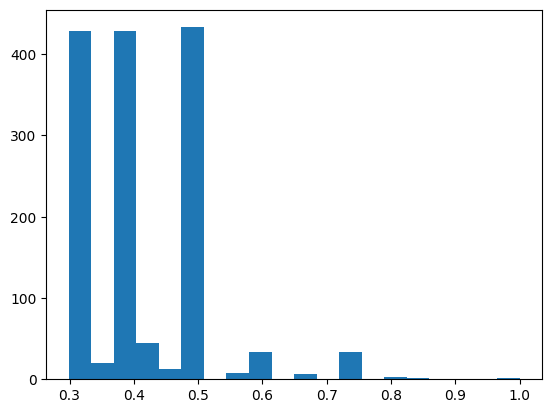

In [17]:
# Create visualization of the interest measure in a bell curve
plt.hist(df_result['interest'], bins=20)

In [18]:
threshold = 0.2
df_interesting = df_result[df_result['interest'] > threshold]

df_interesting = df_result.sort_values(['support_relative','interest'], ascending=False)
df_interesting

,consequent,antecedent,support_absolute,support_relative,confidence,interest
1418,whole milk,"(brandy,)",38,0.002540,0.342105,0.339566
230,whole milk,"(pork, sausage)",23,0.001537,0.391304,0.389767
348,whole milk,"(beef, whipped/sour cream)",21,0.001403,0.333333,0.331930
249,other vegetables,"(pork, citrus fruit)",20,0.001337,0.350000,0.348663
255,yogurt,"(pork, citrus fruit)",20,0.001337,0.300000,0.298663
...,...,...,...,...,...,...
746,pastry,"(specialty chocolate, curd, citrus fruit)",4,0.000267,0.500000,0.499733
766,other vegetables,"(specialty chocolate, hamburger meat)",4,0.000267,0.500000,0.499733
804,bottled beer,"(misc. beverages, waffles)",4,0.000267,0.500000,0.499733
692,other vegetables,"(ham, chicken)",4,0.000267,0.500000,0.499733


### Recommendations

The owner of the grocery store can use the association rules to determine which items are frequently bought together. In this case, we recommend that the store place the following items near each other to encourage customers to buy them together (top 5 item combinations):
- brandy with whole milk
- pork and sausage with whole milk
- beef and whipped/sour cream with whole milk
- pork and citrus fruit with other vegetables
- pork and citrus fruit with yogurt

Based on the top 5 recommendations, all the association rules are mostly attributed with items that are seen together inside the refrigerator.

## Grouping Items by Month-Member

To calculate the associaton rules and find the significant/interesting items in the dataset according to `Month` from `Date`

In [19]:
# Aggregate df groupby Month
df['Month'] = df['Date'].dt.month
df_grouped = df.groupby(['Month', 'Member_number']).agg(list)

df_grouped.sort_values(['Month', 'Member_number'], inplace=True)
df_grouped

Date  \
Month Member_number                                                      
1     1001           [2015-01-20 00:00:00, 2015-01-20 00:00:00, 201...   
      1003                  [2014-01-19 00:00:00, 2014-01-19 00:00:00]   
      1005           [2014-01-23 00:00:00, 2014-01-09 00:00:00, 201...   
      1009                  [2014-01-24 00:00:00, 2014-01-24 00:00:00]   
      1013           [2014-01-17 00:00:00, 2014-01-17 00:00:00, 201...   
...                                                                ...   
12    4988           [2015-12-20 00:00:00, 2014-12-13 00:00:00, 201...   
      4990                  [2015-12-14 00:00:00, 2015-12-14 00:00:00]   
      4991                  [2014-12-22 00:00:00, 2014-12-22 00:00:00]   
      4997           [2015-12-27 00:00:00, 2015-12-27 00:00:00, 201...   
      4999                  [2015-12-26 00:00:00, 2015-12-26 00:00:00]   

                                                       itemDescription  
Month Member_number                                                     
1     1001                     [frankfurter, soda, whipped/sour cream]  
      1003                                 [frozen meals, dental care]  
      1005           [whipped/sour cream, rolls/buns, margarine, ro...  
      1009                                 [canned fish, cocoa drinks]  
      1013                       [hard cheese, napkins, bottled water]  
...                                                                ...  
12    4988           [pork, misc. beverages, long life bakery produ...  
      4990                       [tropical fruit, specialty chocolate]  
      4991                         [other vegetables, root vegetables]  
      4997                  [tropical fruit, white wine, curd, grapes]  
      4999                                      [bottled water, herbs]  

[12852 rows x 2 columns]

In [20]:
# convert to list format
transactions = df_grouped['itemDescription'].to_list()
transactions

[['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen meals', 'dental care'],
 ['whipped/sour cream', 'rolls/buns', 'margarine', 'rolls/buns'],
 ['canned fish', 'cocoa drinks'],
 ['hard cheese', 'napkins', 'bottled water'],
 ['canned beer', 'cookware'],
 ['whipped/sour cream',
  'root vegetables',
  'rolls/buns',
  'packaged fruit/vegetables'],
 ['whipped/sour cream', 'newspapers'],
 ['fruit/vegetable juice', 'vinegar'],
 ['margarine', 'napkins'],
 ['citrus fruit', 'rolls/buns', 'whole milk'],
 ['root vegetables', 'yogurt', 'butter', 'yogurt'],
 ['curd', 'soda'],
 ['specialty bar', 'margarine'],
 ['hamburger meat', 'bottled beer'],
 ['beef', 'root vegetables', 'shopping bags', 'grapes'],
 ['soda', 'fruit/vegetable juice'],
 ['soda', 'domestic eggs', 'sliced cheese', 'soda'],
 ['whole milk', 'sauces'],
 ['rolls/buns', 'candy'],
 ['hamburger meat',
  'tropical fruit',
  'soda',
  'whole milk',
  'long life bakery product',
  'rum'],
 ['pork', 'rolls/buns'],
 ['detergent', 'candy'],
 

### Frequent Itemset Mining

In [21]:
# calculates the frequent itemset using fpgrowth algorithm
def get_fim(supp, transactions):
    result = fpgrowth(transactions, supp=supp, report='as')
    colnames = ['itemset'] + ['support_absolute', 'support_relative']
    df_result = pd.DataFrame(result, columns=colnames)
    df_result = df_result.sort_values('support_absolute', ascending=False)
    return df_result

#### Checking for Ideal Support Threshold

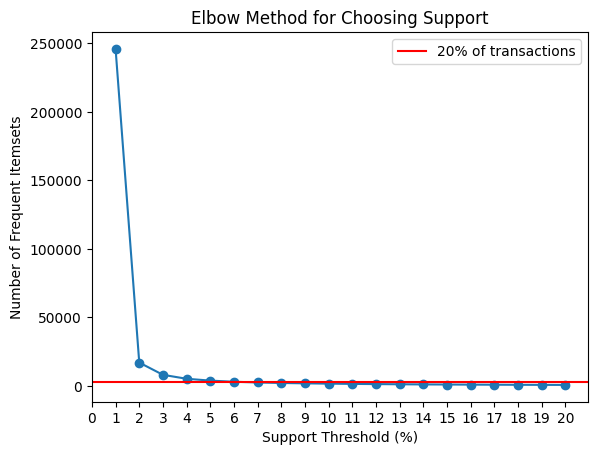

In [22]:
supports = range(1, 21)  # Test supports from 1% to 20%
num_itemsets = []

for supp in supports:
    rules = get_fim(supp*-1, transactions)
    num_itemsets.append(len(rules))

plt.plot(supports, num_itemsets, marker='o')
plt.axhline(y = len(df_grouped)*0.2, color = 'r', label = '20% of transactions')
plt.xticks([x for x in range(21)])
plt.xlabel("Support Threshold (%)")
plt.ylabel("Number of Frequent Itemsets")
plt.title("Elbow Method for Choosing Support")
plt.legend()
plt.show()

#### Zoom in the Plot

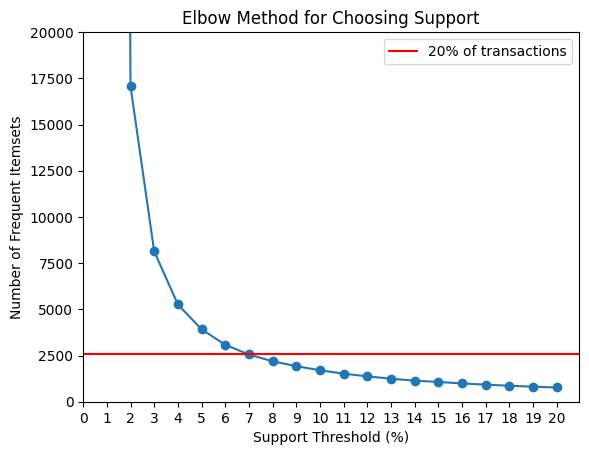

In [23]:
plt.plot(supports, num_itemsets, marker='o')
plt.axhline(y = len(df_grouped)*0.2, color = 'r', label = '20% of transactions')
plt.xticks([x for x in range(21)])
plt.xlabel("Support Threshold (%)")
plt.ylabel("Number of Frequent Itemsets")
plt.ylim([0,20000])
plt.title("Elbow Method for Choosing Support")
plt.legend()
plt.show()

The Support Threshold is obtained through the **elbow method** (inspired from K-Means Clustering) to generate *enough* rules and avoid *noise*. <br/>
Ideally, we want to be approximately equal to 20% of the transactions (represented by the redline) and not very steep nor flat at the given point so that we avoid the exteremely rare and extremely common itemsets. <br/> Hence, the
***Support Threshold is set to 7.***

#### Get the Frequent Itemsets given that Support Threshold is set to 7

In [24]:
get_fim(-7, transactions)

,itemset,support_absolute,support_relative
0,"(whole milk,)",2305,0.179350
2,"(other vegetables,)",1789,0.139200
6,"(rolls/buns,)",1615,0.125661
13,"(soda,)",1431,0.111345
24,"(yogurt,)",1269,0.098739
...,...,...,...
678,"(butter, rolls/buns, other vegetables)",7,0.000545
2071,"(soft cheese, yogurt, other vegetables)",7,0.000545
689,"(butter, sausage, soda)",7,0.000545
2064,"(processed cheese, meat)",7,0.000545


### Significant Itemsets

In [25]:
# calculates the frequent itemset using fpgrowth algorithm
def get_sig(supp, conf, transactions):
    result = arules(transactions, supp=supp, conf=conf, report='bxc')
    colnames = ['consequent', 'antecedent'] + ['support_absolute', 'support_relative', 'confidence']
    df_result = pd.DataFrame(result, columns=colnames)
    df_result = df_result.sort_values('support_absolute', ascending=False)
    return df_result

# b - absolute body/antecedent item set  support (number of transactions)
# x - relative body/antecedent item set  support as a fraction
# c - rule confidence as a fraction

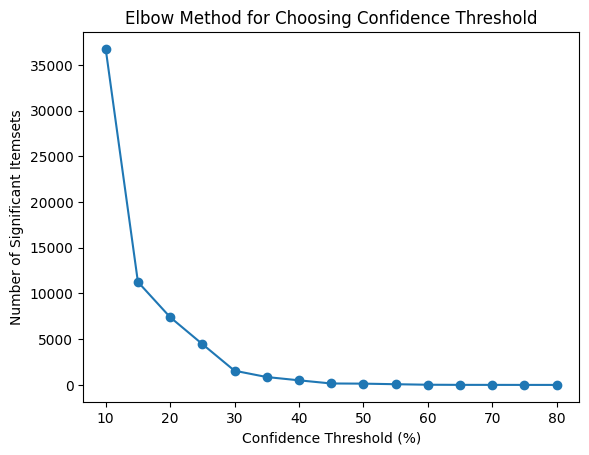

In [26]:
confidence = range(10, 81, 5)  # Test supports from 1% to 20%
num_itemsets = []

for conf in confidence:
    rules = get_sig(-7, conf, transactions)
    num_itemsets.append(len(rules))

plt.plot(confidence, num_itemsets, marker='o')
plt.xlabel("Confidence Threshold (%)")
plt.ylabel("Number of Significant Itemsets")
plt.title("Elbow Method for Choosing Confidence Threshold")
plt.show()

In [27]:
df_result = get_sig(-7, 30, transactions)
df_result

,consequent,antecedent,support_absolute,support_relative,confidence
16,whole milk,"(sausage, yogurt)",105,0.008170,0.323810
68,whole milk,"(pastry, soda)",80,0.006225,0.312500
611,other vegetables,"(coffee, rolls/buns)",52,0.004046,0.326923
677,whole milk,"(chocolate, other vegetables)",44,0.003424,0.318182
266,whole milk,"(whipped/sour cream, citrus fruit)",42,0.003268,0.309524
...,...,...,...,...,...
1328,rolls/buns,"(soft cheese, fruit/vegetable juice)",7,0.000545,0.571429
1327,rolls/buns,"(soft cheese, butter)",7,0.000545,0.571429
586,sausage,"(margarine, yogurt, whole milk)",7,0.000545,0.571429
1325,tropical fruit,"(soft cheese, curd)",7,0.000545,0.428571


#### Interesting Itemsets

In [28]:
df_result['interest'] = df_result['confidence'] - df_result['support_relative']

df_result = df_result.sort_values('interest', ascending=False)
df_result

,consequent,antecedent,support_absolute,support_relative,confidence,interest
69,whole milk,"(pastry, soda, other vegetables)",8,0.000622,0.750000,0.749378
166,yogurt,"(bottled beer, pip fruit, whole milk)",7,0.000545,0.714286,0.713741
629,other vegetables,"(coffee, frankfurter, rolls/buns)",7,0.000545,0.714286,0.713741
1343,other vegetables,"(semi-finished bread, shopping bags)",7,0.000545,0.714286,0.713741
449,whole milk,"(pork, sausage, yogurt)",9,0.000700,0.666667,0.665966
...,...,...,...,...,...,...
1112,other vegetables,"(oil, pork)",20,0.001556,0.300000,0.298444
0,whole milk,"(yogurt, soda, other vegetables)",20,0.001556,0.300000,0.298444
974,other vegetables,"(meat, pip fruit)",20,0.001556,0.300000,0.298444
1041,rolls/buns,"(hard cheese, soda)",20,0.001556,0.300000,0.298444


#### Set Threshold for Interest

In [29]:
df_result['interest'].mean()

0.3760863330635802

(array([355., 331.,  99., 260.,  71., 223.,  68.,   6.,  58.,   0.,   5.,
         11.,  45.,   3.,  12.,   0.,   2.,   0.,   3.,   1.]),
 array([0.29688764, 0.31951214, 0.34213663, 0.36476113, 0.38738562,
        0.41001012, 0.43263461, 0.4552591 , 0.4778836 , 0.50050809,
        0.52313259, 0.54575708, 0.56838157, 0.59100607, 0.61363056,
        0.63625506, 0.65887955, 0.68150405, 0.70412854, 0.72675303,
        0.74937753]),
 <BarContainer object of 20 artists>)

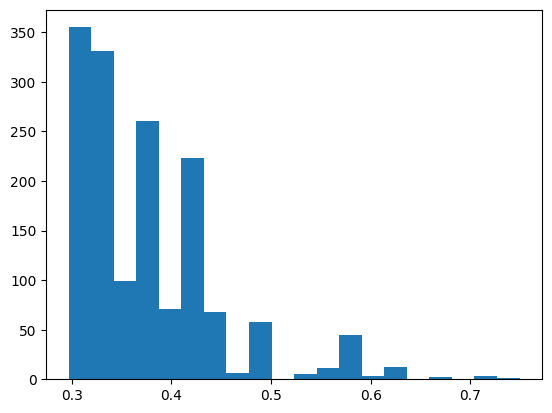

In [30]:
# Create visualization of the interest measure in a bell curve
plt.hist(df_result['interest'], bins=20)

In [31]:
threshold = 0.2
df_interesting = df_result[df_result['interest'] > threshold]

df_interesting = df_result.sort_values(['support_relative','interest'], ascending=False)
df_interesting

,consequent,antecedent,support_absolute,support_relative,confidence,interest
16,whole milk,"(sausage, yogurt)",105,0.008170,0.323810,0.315640
68,whole milk,"(pastry, soda)",80,0.006225,0.312500,0.306275
611,other vegetables,"(coffee, rolls/buns)",52,0.004046,0.326923,0.322877
677,whole milk,"(chocolate, other vegetables)",44,0.003424,0.318182,0.314758
266,whole milk,"(whipped/sour cream, citrus fruit)",42,0.003268,0.309524,0.306256
...,...,...,...,...,...,...
475,rolls/buns,"(curd, root vegetables, whole milk)",7,0.000545,0.428571,0.428027
1481,rolls/buns,"(candles, tropical fruit)",7,0.000545,0.428571,0.428027
1484,sausage,"(candles, beef)",7,0.000545,0.428571,0.428027
1524,salty snack,"(chocolate marshmallow, other vegetables)",7,0.000545,0.428571,0.428027


### Recommendations

The owner of the grocery store can use the association rules to determine which items are frequently bought together. In this case, we recommend that the store place the following items near each other to encourage customers to buy them together (top 5 item combinations):
- sausage and yogurt with whole milk
- pastry and soda with whole milk
- coffee and rolls/buns with other vegetables
- chocolate and other vegetables with whole milk
- whipped/sour cream and citrus fruit with whole milk

Based on the top 5 recommendations, all the association rules are mostly attributed with items that are seen together inside the refrigerator.

## Other Groupings that could give High Confidence/Interest

### Group By Quarter-Member

Another grouping that could give us high confidence/interest is grouping the **items by quarter-member**. This will allow the store to determine which items are frequently bought together on a quarterly basis.

To calculate the associaton rules and find the significant/interesting items in the dataset according to `Quarter` from `Date`

In [32]:
# Aggregate df groupby Quarter
df['Quarter'] = df['Date'].dt.quarter
df_grouped = df.groupby(['Quarter', 'Member_number']).agg(list)

df_grouped.sort_values(['Quarter', 'Member_number'], inplace=True)
df_grouped

Date  \
Quarter Member_number                                                      
1       1000           [2015-03-15 00:00:00, 2015-03-15 00:00:00, 201...   
        1001           [2015-01-20 00:00:00, 2014-02-07 00:00:00, 201...   
        1002                  [2014-02-09 00:00:00, 2014-02-09 00:00:00]   
        1003           [2015-02-10 00:00:00, 2015-02-10 00:00:00, 201...   
        1004           [2014-02-04 00:00:00, 2014-02-04 00:00:00, 201...   
...                                                                  ...   
4       4996           [2015-10-24 00:00:00, 2015-11-24 00:00:00, 201...   
        4997           [2015-12-27 00:00:00, 2015-12-27 00:00:00, 201...   
        4998                  [2015-10-14 00:00:00, 2015-10-14 00:00:00]   
        4999                  [2015-12-26 00:00:00, 2015-12-26 00:00:00]   
        5000                  [2014-11-16 00:00:00, 2014-11-16 00:00:00]   

                                                         itemDescription  \
Quarter Member_number                                                      
1       1000           [sausage, whole milk, semi-finished bread, yog...   
        1001           [frankfurter, sausage, soda, whole milk, whipp...   
        1002                       [frozen vegetables, other vegetables]   
        1003           [sausage, rolls/buns, frozen meals, rolls/buns...   
        1004                     [pip fruit, whole milk, tropical fruit]   
...                                                                  ...   
4       4996           [dessert, rolls/buns, misc. beverages, bottled...   
        4997                  [tropical fruit, white wine, curd, grapes]   
        4998                                          [rolls/buns, curd]   
        4999                                      [bottled water, herbs]   
        5000                            [bottled beer, other vegetables]   

                                                  Month  
Quarter Member_number                                    
1       1000                               [3, 3, 3, 3]  
        1001                         [1, 2, 1, 2, 1, 2]  
        1002                                     [2, 2]  
        1003                         [2, 2, 1, 2, 1, 2]  
        1004                                  [2, 2, 2]  
...                                                 ...  
4       4996           [10, 11, 11, 10, 11, 11, 11, 11]  
        4997                           [12, 12, 12, 12]  
        4998                                   [10, 10]  
        4999                                   [12, 12]  
        5000                                   [11, 11]  

[9695 rows x 3 columns]

In [33]:
# convert to list format
transactions = df_grouped['itemDescription'].to_list()
transactions

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['frankfurter',
  'sausage',
  'soda',
  'whole milk',
  'whipped/sour cream',
  'rolls/buns'],
 ['frozen vegetables', 'other vegetables'],
 ['sausage',
  'rolls/buns',
  'frozen meals',
  'rolls/buns',
  'dental care',
  'rolls/buns'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['whipped/sour cream', 'rolls/buns', 'margarine', 'rolls/buns'],
 ['canned fish', 'cocoa drinks'],
 ['pip fruit', 'coffee', 'UHT-milk'],
 ['citrus fruit', 'candy', 'bottled water', 'rolls/buns'],
 ['processed cheese', 'whole milk'],
 ['whole milk',
  'tropical fruit',
  'mustard',
  'hard cheese',
  'candy',
  'frozen vegetables',
  'whipped/sour cream',
  'napkins',
  'bottled water'],
 ['canned beer', 'cookware'],
 ['salty snack', 'beef'],
 ['other vegetables', 'root vegetables'],
 ['beef', 'whole milk', 'napkins', 'whipped/sour cream'],
 ['whipped/sour cream',
  'root vegetables',
  'rolls/buns',
  'packaged fruit/vegetables'],
 ['ham', 'cof

### Frequent Itemset Mining

In [34]:
# calculates the frequent itemset using fpgrowth algorithm
def get_fim(supp, transactions):
    result = fpgrowth(transactions, supp=supp, report='as')
    colnames = ['itemset'] + ['support_absolute', 'support_relative']
    df_result = pd.DataFrame(result, columns=colnames)
    df_result = df_result.sort_values('support_absolute', ascending=False)
    return df_result

#### Checking for Ideal Support Threshold

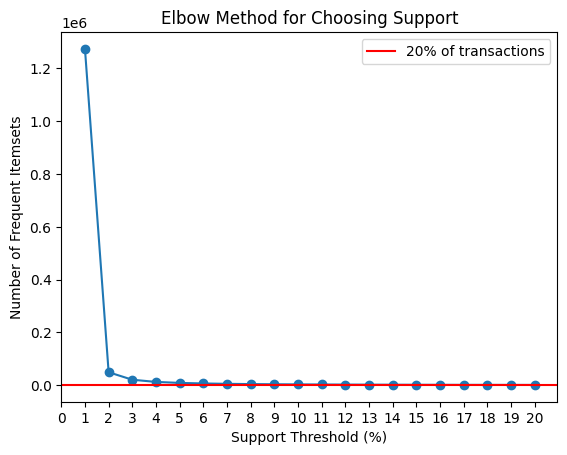

In [35]:
supports = range(1, 21)  # Test supports from 1% to 20%
num_itemsets = []

for supp in supports:
    rules = get_fim(supp*-1, transactions)
    num_itemsets.append(len(rules))

plt.plot(supports, num_itemsets, marker='o')
plt.axhline(y = len(df_grouped)*0.2, color = 'r', label = '20% of transactions')
plt.xticks([x for x in range(21)])
plt.xlabel("Support Threshold (%)")
plt.ylabel("Number of Frequent Itemsets")
plt.title("Elbow Method for Choosing Support")
plt.legend()
plt.show()

#### Zoom in the Plot

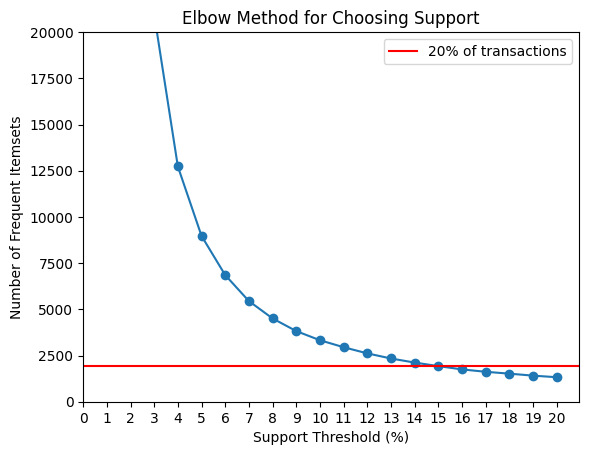

In [36]:
plt.plot(supports, num_itemsets, marker='o')
plt.axhline(y = len(df_grouped)*0.2, color = 'r', label = '20% of transactions')
plt.xticks([x for x in range(21)])
plt.xlabel("Support Threshold (%)")
plt.ylabel("Number of Frequent Itemsets")
plt.ylim([0,20000])
plt.title("Elbow Method for Choosing Support")
plt.legend()
plt.show()

The Support Threshold is obtained through the **elbow method** (inspired from K-Means Clustering) to generate *enough* rules and avoid *noise*. <br/>
Ideally, we want to be approximately equal to 20% of the transactions (represented by the redline) and not very steep nor flat at the given point so that we avoid the exteremely rare and extremely common itemsets. <br/> Hence, the
***Support Threshold is set to 15.***

#### Get the Frequent Itemsets given that Support Threshold is set to 7

In [37]:
get_fim(-15, transactions)

,itemset,support_absolute,support_relative
0,"(whole milk,)",2179,0.224755
2,"(other vegetables,)",1723,0.177720
6,"(rolls/buns,)",1567,0.161630
14,"(soda,)",1385,0.142857
26,"(yogurt,)",1229,0.126766
...,...,...,...
305,"(bottled beer, sausage, soda)",15,0.001547
1467,"(misc. beverages, onions)",15,0.001547
231,"(pip fruit, citrus fruit, whole milk)",15,0.001547
1459,"(misc. beverages, whipped/sour cream)",15,0.001547


### Significant Itemsets

In [38]:
# calculates the frequent itemset using fpgrowth algorithm
def get_sig(supp, conf, transactions):
    result = arules(transactions, supp=supp, conf=conf, report='bxc')
    colnames = ['consequent', 'antecedent'] + ['support_absolute', 'support_relative', 'confidence']
    df_result = pd.DataFrame(result, columns=colnames)
    df_result = df_result.sort_values('support_absolute', ascending=False)
    return df_result

# b - absolute body/antecedent item set  support (number of transactions)
# x - relative body/antecedent item set  support as a fraction
# c - rule confidence as a fraction

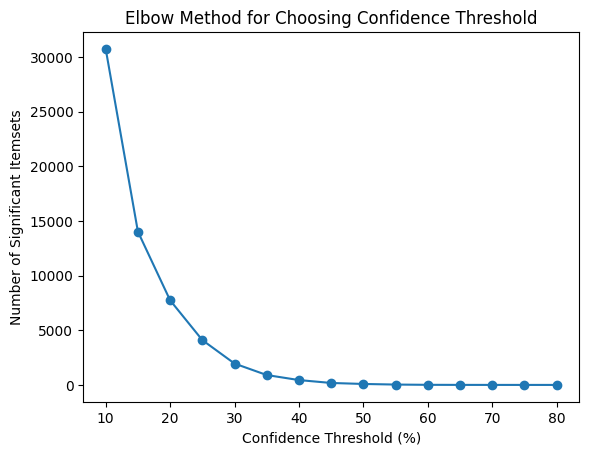

In [39]:
confidence = range(10, 81, 5)  # Test supports from 1% to 20%
num_itemsets = []

for conf in confidence:
    rules = get_sig(-15, conf, transactions)
    num_itemsets.append(len(rules))

plt.plot(confidence, num_itemsets, marker='o')
plt.xlabel("Confidence Threshold (%)")
plt.ylabel("Number of Significant Itemsets")
plt.title("Elbow Method for Choosing Confidence Threshold")
plt.show()

In [40]:
df_result = get_sig(-15, 30, transactions)
df_result

,consequent,antecedent,support_absolute,support_relative,confidence
0,whole milk,"(rolls/buns, other vegetables)",315,0.032491,0.307937
1,whole milk,"(yogurt, other vegetables)",223,0.023002,0.327354
2,whole milk,"(yogurt, rolls/buns)",208,0.021454,0.302885
20,whole milk,"(tropical fruit, other vegetables)",189,0.019495,0.301587
4,whole milk,"(yogurt, soda)",187,0.019288,0.315508
...,...,...,...,...,...
1340,yogurt,"(sugar, curd)",15,0.001547,0.400000
1339,soda,"(sugar, curd)",15,0.001547,0.400000
1338,rolls/buns,"(sugar, curd)",15,0.001547,0.333333
1337,whole milk,"(sugar, curd)",15,0.001547,0.400000


#### Interesting Itemsets

In [41]:
df_result['interest'] = df_result['confidence'] - df_result['support_relative']

df_result = df_result.sort_values('interest', ascending=False)
df_result

,consequent,antecedent,support_absolute,support_relative,confidence,interest
245,whole milk,"(canned beer, yogurt, other vegetables)",17,0.001753,0.823529,0.821776
468,whole milk,"(frankfurter, sausage, rolls/buns)",15,0.001547,0.733333,0.731786
760,whole milk,"(curd, yogurt, other vegetables)",19,0.001960,0.684211,0.682251
1693,whole milk,"(hygiene articles, curd)",15,0.001547,0.666667,0.665119
886,whole milk,"(coffee, bottled water, other vegetables)",17,0.001753,0.647059,0.645305
...,...,...,...,...,...,...
278,whole milk,"(bottled beer, other vegetables)",145,0.014956,0.303448,0.288492
88,whole milk,"(bottled water, soda)",146,0.015059,0.301370,0.286311
20,whole milk,"(tropical fruit, other vegetables)",189,0.019495,0.301587,0.282093
2,whole milk,"(yogurt, rolls/buns)",208,0.021454,0.302885,0.281430


#### Set Threshold for Interest

In [42]:
df_result['interest'].mean()

0.35966849257949574

(array([193., 478., 537., 228., 217., 103.,  74.,  36.,  33.,  24.,   7.,
         18.,   1.,   2.,   2.,   0.,   1.,   0.,   0.,   1.]),
 array([0.27544553, 0.30276205, 0.33007857, 0.35739509, 0.38471161,
        0.41202813, 0.43934465, 0.46666117, 0.49397769, 0.52129421,
        0.54861073, 0.57592725, 0.60324377, 0.63056029, 0.65787681,
        0.68519333, 0.71250985, 0.73982637, 0.76714289, 0.79445941,
        0.82177593]),
 <BarContainer object of 20 artists>)

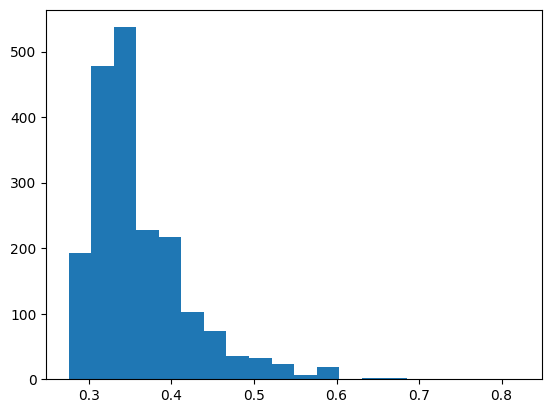

In [43]:
# Create visualization of the interest measure in a bell curve
plt.hist(df_result['interest'], bins=20)

In [44]:
threshold = 0.2
df_interesting = df_result[df_result['interest'] > threshold]

df_interesting = df_result.sort_values(['support_relative','interest'], ascending=False)
df_interesting

,consequent,antecedent,support_absolute,support_relative,confidence,interest
0,whole milk,"(rolls/buns, other vegetables)",315,0.032491,0.307937,0.275446
1,whole milk,"(yogurt, other vegetables)",223,0.023002,0.327354,0.304353
2,whole milk,"(yogurt, rolls/buns)",208,0.021454,0.302885,0.281430
20,whole milk,"(tropical fruit, other vegetables)",189,0.019495,0.301587,0.282093
4,whole milk,"(yogurt, soda)",187,0.019288,0.315508,0.296220
...,...,...,...,...,...,...
1401,rolls/buns,"(frozen meals, frozen vegetables)",15,0.001547,0.333333,0.331786
1419,ham,"(citrus fruit, tropical fruit, rolls/buns)",15,0.001547,0.333333,0.331786
1593,root vegetables,"(hard cheese, pork)",15,0.001547,0.333333,0.331786
1608,soda,"(oil, canned beer)",15,0.001547,0.333333,0.331786


### Group By Weekday-Member

Another grouping that could give us high confidence/interest is grouping the **items by weekday-member**. This will allow the store to determine which items are frequently bought together on a daily basis.

To calculate the associaton rules and find the significant/interesting items in the dataset according to `Weekday` from `Date`

In [45]:
# Aggregate df groupby Day
df['Weekday'] = df['Date'].dt.weekday
df_grouped = df.groupby(['Weekday', 'Member_number']).agg(list)

df_grouped.sort_values(['Weekday', 'Member_number'], inplace=True)
df_grouped

Date  \
Weekday Member_number                                                      
0       1004           [2014-10-13 00:00:00, 2014-10-13 00:00:00, 201...   
        1009           [2015-10-05 00:00:00, 2015-10-05 00:00:00, 201...   
        1011                  [2014-06-02 00:00:00, 2014-06-02 00:00:00]   
        1014                  [2014-10-06 00:00:00, 2014-10-06 00:00:00]   
        1015                  [2015-05-04 00:00:00, 2015-05-04 00:00:00]   
...                                                                  ...   
6       4993                  [2014-05-25 00:00:00, 2014-05-25 00:00:00]   
        4994                  [2015-02-08 00:00:00, 2015-02-08 00:00:00]   
        4995                  [2014-03-16 00:00:00, 2014-03-16 00:00:00]   
        4997           [2015-12-27 00:00:00, 2015-12-27 00:00:00, 201...   
        5000           [2014-11-16 00:00:00, 2014-03-09 00:00:00, 201...   

                                                         itemDescription  \
Weekday Member_number                                                      
0       1004           [whole milk, chocolate, packaged fruit/vegetab...   
        1009                                 [herbs, yogurt, newspapers]   
        1011                                       [curd cheese, pastry]   
        1014                                    [whole milk, rolls/buns]   
        1015                                  [citrus fruit, whole milk]   
...                                                                  ...   
6       4993                                 [rolls/buns, shopping bags]   
        4994                            [sausage, fruit/vegetable juice]   
        4995                                        [rice, dish cleaner]   
        4997           [tropical fruit, white wine, whole milk, curd,...   
        5000           [bottled beer, fruit/vegetable juice, other ve...   

                                        Month             Quarter  
Weekday Member_number                                              
0       1004                 [10, 10, 10, 10]        [4, 4, 4, 4]  
        1009                     [10, 10, 10]           [4, 4, 4]  
        1011                           [6, 6]              [2, 2]  
        1014                         [10, 10]              [4, 4]  
        1015                           [5, 5]              [2, 2]  
...                                       ...                 ...  
6       4993                           [5, 5]              [2, 2]  
        4994                           [2, 2]              [1, 1]  
        4995                           [3, 3]              [1, 1]  
        4997           [12, 12, 1, 12, 12, 1]  [4, 4, 1, 4, 4, 1]  
        5000                   [11, 3, 11, 3]        [4, 1, 4, 1]  

[11560 rows x 4 columns]

In [46]:
# convert to list format
transactions = df_grouped['itemDescription'].to_list()
transactions

[['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['herbs', 'yogurt', 'newspapers'],
 ['curd cheese', 'pastry'],
 ['whole milk', 'rolls/buns'],
 ['citrus fruit', 'whole milk'],
 ['UHT-milk', 'bottled beer'],
 ['fish', 'root vegetables', 'tropical fruit', 'other vegetables'],
 ['ham', 'cream cheese '],
 ['rolls/buns', 'bottled water'],
 ['soda', 'butter'],
 ['berries',
  'ice cream',
  'soda',
  'butter',
  'other vegetables',
  'whipped/sour cream',
  'white bread',
  'cream cheese '],
 ['chicken', 'sausage', 'waffles', 'snack products', 'rolls/buns'],
 ['pip fruit',
  'bottled water',
  'cling film/bags',
  'domestic eggs',
  'yogurt',
  'cat food',
  'frozen meals'],
 ['fruit/vegetable juice', 'vinegar'],
 ['tropical fruit', 'white bread', 'rolls/buns'],
 ['Instant food products', 'whipped/sour cream', 'butter', 'cake bar'],
 ['prosecco', 'dessert'],
 ['napkins', 'whole milk', 'chocolate marshmallow'],
 ['tropical fruit', 'other vegetables'],
 ['meat', 'whole 

### Frequent Itemset Mining

In [47]:
# calculates the frequent itemset using fpgrowth algorithm
def get_fim(supp, transactions):
    result = fpgrowth(transactions, supp=supp, report='as')
    colnames = ['itemset'] + ['support_absolute', 'support_relative']
    df_result = pd.DataFrame(result, columns=colnames)
    df_result = df_result.sort_values('support_absolute', ascending=False)
    return df_result

#### Checking for Ideal Support Threshold

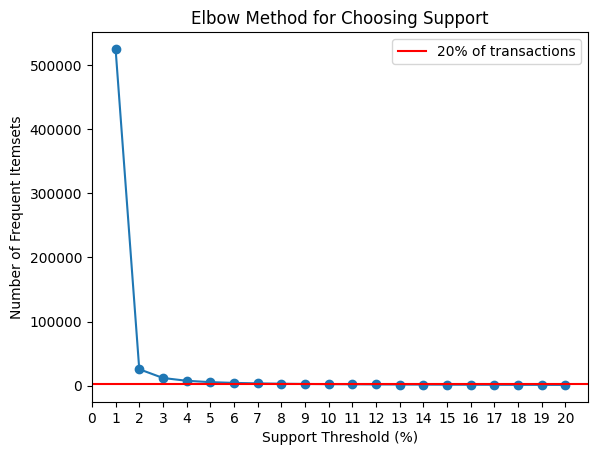

In [48]:
supports = range(1, 21)  # Test supports from 1% to 20%
num_itemsets = []

for supp in supports:
    rules = get_fim(supp*-1, transactions)
    num_itemsets.append(len(rules))

plt.plot(supports, num_itemsets, marker='o')
plt.axhline(y = len(df_grouped)*0.2, color = 'r', label = '20% of transactions')
plt.xticks([x for x in range(21)])
plt.xlabel("Support Threshold (%)")
plt.ylabel("Number of Frequent Itemsets")
plt.title("Elbow Method for Choosing Support")
plt.legend()
plt.show()

#### Zoom in the Plot

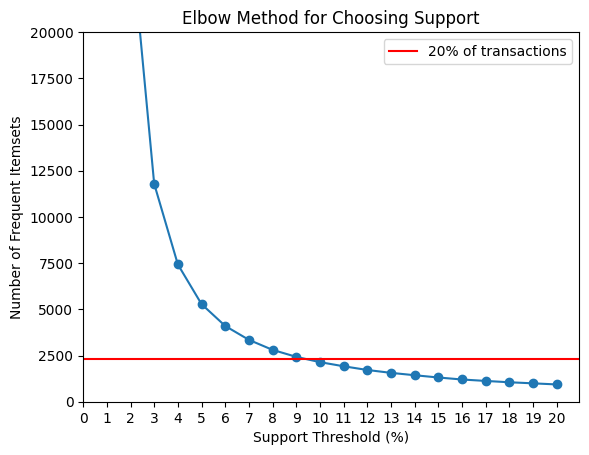

In [49]:
plt.plot(supports, num_itemsets, marker='o')
plt.axhline(y = len(df_grouped)*0.2, color = 'r', label = '20% of transactions')
plt.xticks([x for x in range(21)])
plt.xlabel("Support Threshold (%)")
plt.ylabel("Number of Frequent Itemsets")
plt.ylim([0,20000])
plt.title("Elbow Method for Choosing Support")
plt.legend()
plt.show()

The Support Threshold is obtained through the **elbow method** (inspired from K-Means Clustering) to generate *enough* rules and avoid *noise*. <br/>
Ideally, we want to be approximately equal to 20% of the transactions (represented by the redline) and not very steep nor flat at the given point so that we avoid the exteremely rare and extremely common itemsets. <br/> Hence, the
***Support Threshold is set to 9.***

#### Get the Frequent Itemsets given that Support Threshold is set to 9

In [50]:
get_fim(-9, transactions)

,itemset,support_absolute,support_relative
0,"(whole milk,)",2253,0.194896
2,"(other vegetables,)",1771,0.153201
6,"(rolls/buns,)",1595,0.137976
13,"(soda,)",1411,0.122059
25,"(yogurt,)",1258,0.108824
...,...,...,...
1970,"(soft cheese, whipped/sour cream)",9,0.000779
1966,"(soft cheese, citrus fruit)",9,0.000779
1964,"(soft cheese, tropical fruit)",9,0.000779
1961,"(soft cheese, yogurt, other vegetables)",9,0.000779


### Significant Itemsets

In [51]:
# calculates the frequent itemset using fpgrowth algorithm
def get_sig(supp, conf, transactions):
    result = arules(transactions, supp=supp, conf=conf, report='bxc')
    colnames = ['consequent', 'antecedent'] + ['support_absolute', 'support_relative', 'confidence']
    df_result = pd.DataFrame(result, columns=colnames)
    df_result = df_result.sort_values('support_absolute', ascending=False)
    return df_result

# b - absolute body/antecedent item set  support (number of transactions)
# x - relative body/antecedent item set  support as a fraction
# c - rule confidence as a fraction

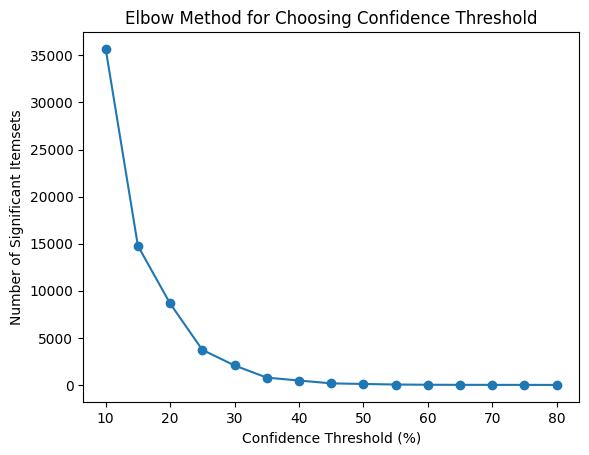

In [52]:
confidence = range(10, 81, 5)  # Test supports from 1% to 20%
num_itemsets = []

for conf in confidence:
    rules = get_sig(-9, conf, transactions)
    num_itemsets.append(len(rules))

plt.plot(confidence, num_itemsets, marker='o')
plt.xlabel("Confidence Threshold (%)")
plt.ylabel("Number of Significant Itemsets")
plt.title("Elbow Method for Choosing Confidence Threshold")
plt.show()

In [53]:
df_result = get_sig(-9, 30, transactions)
df_result

,consequent,antecedent,support_absolute,support_relative,confidence
24,whole milk,"(sausage, yogurt)",122,0.010554,0.344262
58,whole milk,"(pastry, other vegetables)",100,0.008651,0.310000
59,whole milk,"(pastry, rolls/buns)",96,0.008304,0.343750
150,whole milk,"(canned beer, soda)",83,0.007180,0.301205
65,whole milk,"(pastry, yogurt)",81,0.007007,0.333333
...,...,...,...,...,...
696,chicken,"(margarine, yogurt, other vegetables)",9,0.000779,0.333333
697,sausage,"(chicken, margarine, whole milk)",9,0.000779,0.444444
701,canned beer,"(chicken, margarine, whole milk)",9,0.000779,0.333333
1602,root vegetables,"(chewing gum, pip fruit)",9,0.000779,0.333333


In [54]:
df_result['interest'] = df_result['confidence'] - df_result['support_relative']

df_result = df_result.sort_values('interest', ascending=False)
df_result

,consequent,antecedent,support_absolute,support_relative,confidence,interest
1691,whole milk,"(processed cheese, pastry)",10,0.000865,0.800000,0.799135
379,whole milk,"(domestic eggs, soda, rolls/buns)",9,0.000779,0.777778,0.776999
436,whole milk,"(pork, sausage, yogurt)",9,0.000779,0.777778,0.776999
389,whole milk,"(domestic eggs, root vegetables, rolls/buns)",9,0.000779,0.777778,0.776999
1911,whole milk,"(cake bar, other vegetables)",11,0.000952,0.727273,0.726321
...,...,...,...,...,...,...
254,other vegetables,"(frankfurter, yogurt)",66,0.005709,0.303030,0.297321
374,whole milk,"(domestic eggs, other vegetables)",79,0.006834,0.303797,0.296964
1257,whole milk,"(beverages, soda)",40,0.003460,0.300000,0.296540
194,whole milk,"(bottled beer, sausage)",63,0.005450,0.301587,0.296137


In [55]:
threshold = 0.2
df_interesting = df_result[df_result['interest'] > threshold]

df_interesting = df_result.sort_values(['support_relative','interest'], ascending=False)
df_interesting

,consequent,antecedent,support_absolute,support_relative,confidence,interest
24,whole milk,"(sausage, yogurt)",122,0.010554,0.344262,0.333709
58,whole milk,"(pastry, other vegetables)",100,0.008651,0.310000,0.301349
59,whole milk,"(pastry, rolls/buns)",96,0.008304,0.343750,0.335446
150,whole milk,"(canned beer, soda)",83,0.007180,0.301205,0.294025
65,whole milk,"(pastry, yogurt)",81,0.007007,0.333333,0.326326
...,...,...,...,...,...,...
1110,chicken,"(long life bakery product, other vegetables, w...",9,0.000779,0.333333,0.332555
1379,other vegetables,"(specialty chocolate, long life bakery product)",9,0.000779,0.333333,0.332555
1378,root vegetables,"(specialty chocolate, sugar)",9,0.000779,0.333333,0.332555
1377,other vegetables,"(specialty chocolate, sugar)",9,0.000779,0.333333,0.332555


## References

- Teves, J. (n.d.) Association Rule Learning. [Source code]. https://colab.research.google.com/github/Cyntwikip/Data-Mining/blob/main/association_rule_learning/association_rule_learning_homework.ipynb

## End
<sup>made by **Jude Michael Teves**</sup> <br>
<sup>for comments, corrections, suggestions, please email:</sup><sup> <href>judemichaelteves@gmail.com</href> or <href>jude.teves@dlsu.edu.ph</href></sup><br>